## Question 1 Solution

Loading and reading the csv file with no headers so I can handle the rows manually, and I drop the first 6 rows as its irrelevent metadata and the index is reset. Then I set simpler names to columns. And lastly I convert the Dates column to datetime objects with day-first formatting as it initally sees it as MM/DD/YYYY if not set. 

In [4]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV with no header so we can handle the rows manually
df = pd.read_csv('/Users/giacomofiorani/Desktop/Hartree/OilDesk-Intern-Assessment/data/MarketData.csv', 
                 header=None)

# Droping the 6 first rows
df = df.iloc[7:].reset_index(drop=True)

# Assign column names
df.columns = ['Dates', 'COPPER', 'ALUMINIUM', 'ZINC', 'LEAD', 'TIN', 'FUTURE']

# Parsing the Dates column to Date objects and reset the format to dayfirst
df['Dates'] = pd.to_datetime(df['Dates'], dayfirst=True)

Data Filtering and Aggregation. I Keep the columns Dates, COPPER and ZINC. Filtering the data to keep only the data with 2021. And then I needed to numerical values to be able to perform arithmetic operations and statistical analysis. Then, to calcualte the average price per month I initally extract and store the months from the Dates column to a new column. Laslty, I group the data by thte month collumn and compute the averages for Copper and Zinc. 

In [5]:
#code to keep the Dates columm and the headers that contain COPPER and ZINC
cols_to_keep = ['Dates', 'COPPER', 'ZINC']

#filter data to only include the year 2021 data and only keep date, zinc and copper data
df_2021 = df.loc[df['Dates'].dt.year == 2021, cols_to_keep]

#convert the Copper and Zinc columns to numeric values 
df_2021['COPPER'] = pd.to_numeric(df_2021['COPPER'], errors='coerce')
df_2021['ZINC'] = pd.to_numeric(df_2021['ZINC'], errors='coerce')

#extract and store the months from the Dates column
df_2021['Month']= df_2021['Dates'].dt.month

#groupby the data by month and calculate its average price
avg_prices = df_2021.groupby('Month')[['COPPER', 'ZINC']].mean().reset_index()

Plotting the average price per month for Zinc and Copper. I plotted it through 2 y-axis (primary and secondary axis) where the one on the left hand side is for Copper and then the right one for Zinc. I set the range to shwocase all 12 months. 

<Figure size 1000x600 with 0 Axes>

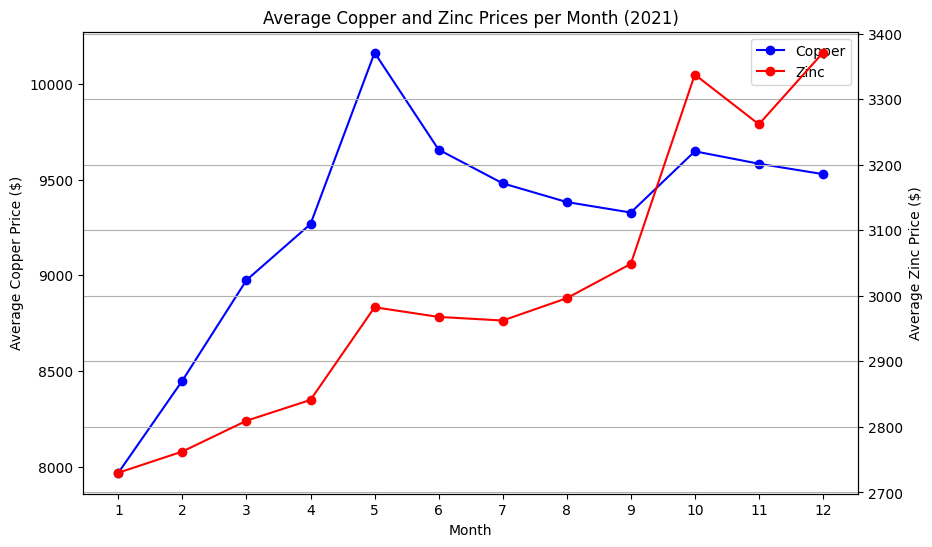

In [6]:
#Plotting the average price per month for Zinc and Copper
plt.figure(figsize=(10, 6))
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(avg_prices['Month'], avg_prices['COPPER'], marker='o', label='Copper', color='blue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Copper Price ($)')
ax1.set_xticks(range(1, 13))
ax2 = ax1.twinx()
ax2.plot(avg_prices['Month'], avg_prices['ZINC'], marker='o', label='Zinc', color='red')
ax2.set_ylabel('Average Zinc Price ($)')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='best')
plt.title('Average Copper and Zinc Prices per Month (2021)')
plt.grid(True)
plt.show()